In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('resume.csv',engine='python',encoding='utf-8', error_bad_lines=False)
df

C:\Users\User\AppData\Local\Temp\ipykernel_26464\1872490198.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('resume.csv',engine='python',encoding='utf-8', error_bad_lines=False)
Skipping line 541: unexpected end of data


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
534,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...
535,Operations Manager,Education Details \r\n BCA Vinayaka Missions...
536,Operations Manager,KEY COMPETENCIES â¶Multi - Operations Managem...
537,Operations Manager,IT SKILLS â¢ Well versed with MS Office and I...


In [3]:
# VISUALIZATION
# gives total unique values
print(df['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager']


In [4]:
# value count gives count of each category
print(df['Category'].value_counts())

Java Developer            84
Web Designing             45
HR                        44
Data Science              40
Mechanical Engineer       40
Sales                     40
Arts                      36
Health and fitness        30
Electrical Engineering    30
Business Analyst          28
Operations Manager        28
Automation Testing        26
Civil Engineer            24
SAP Developer             24
Advocate                  20
Name: Category, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

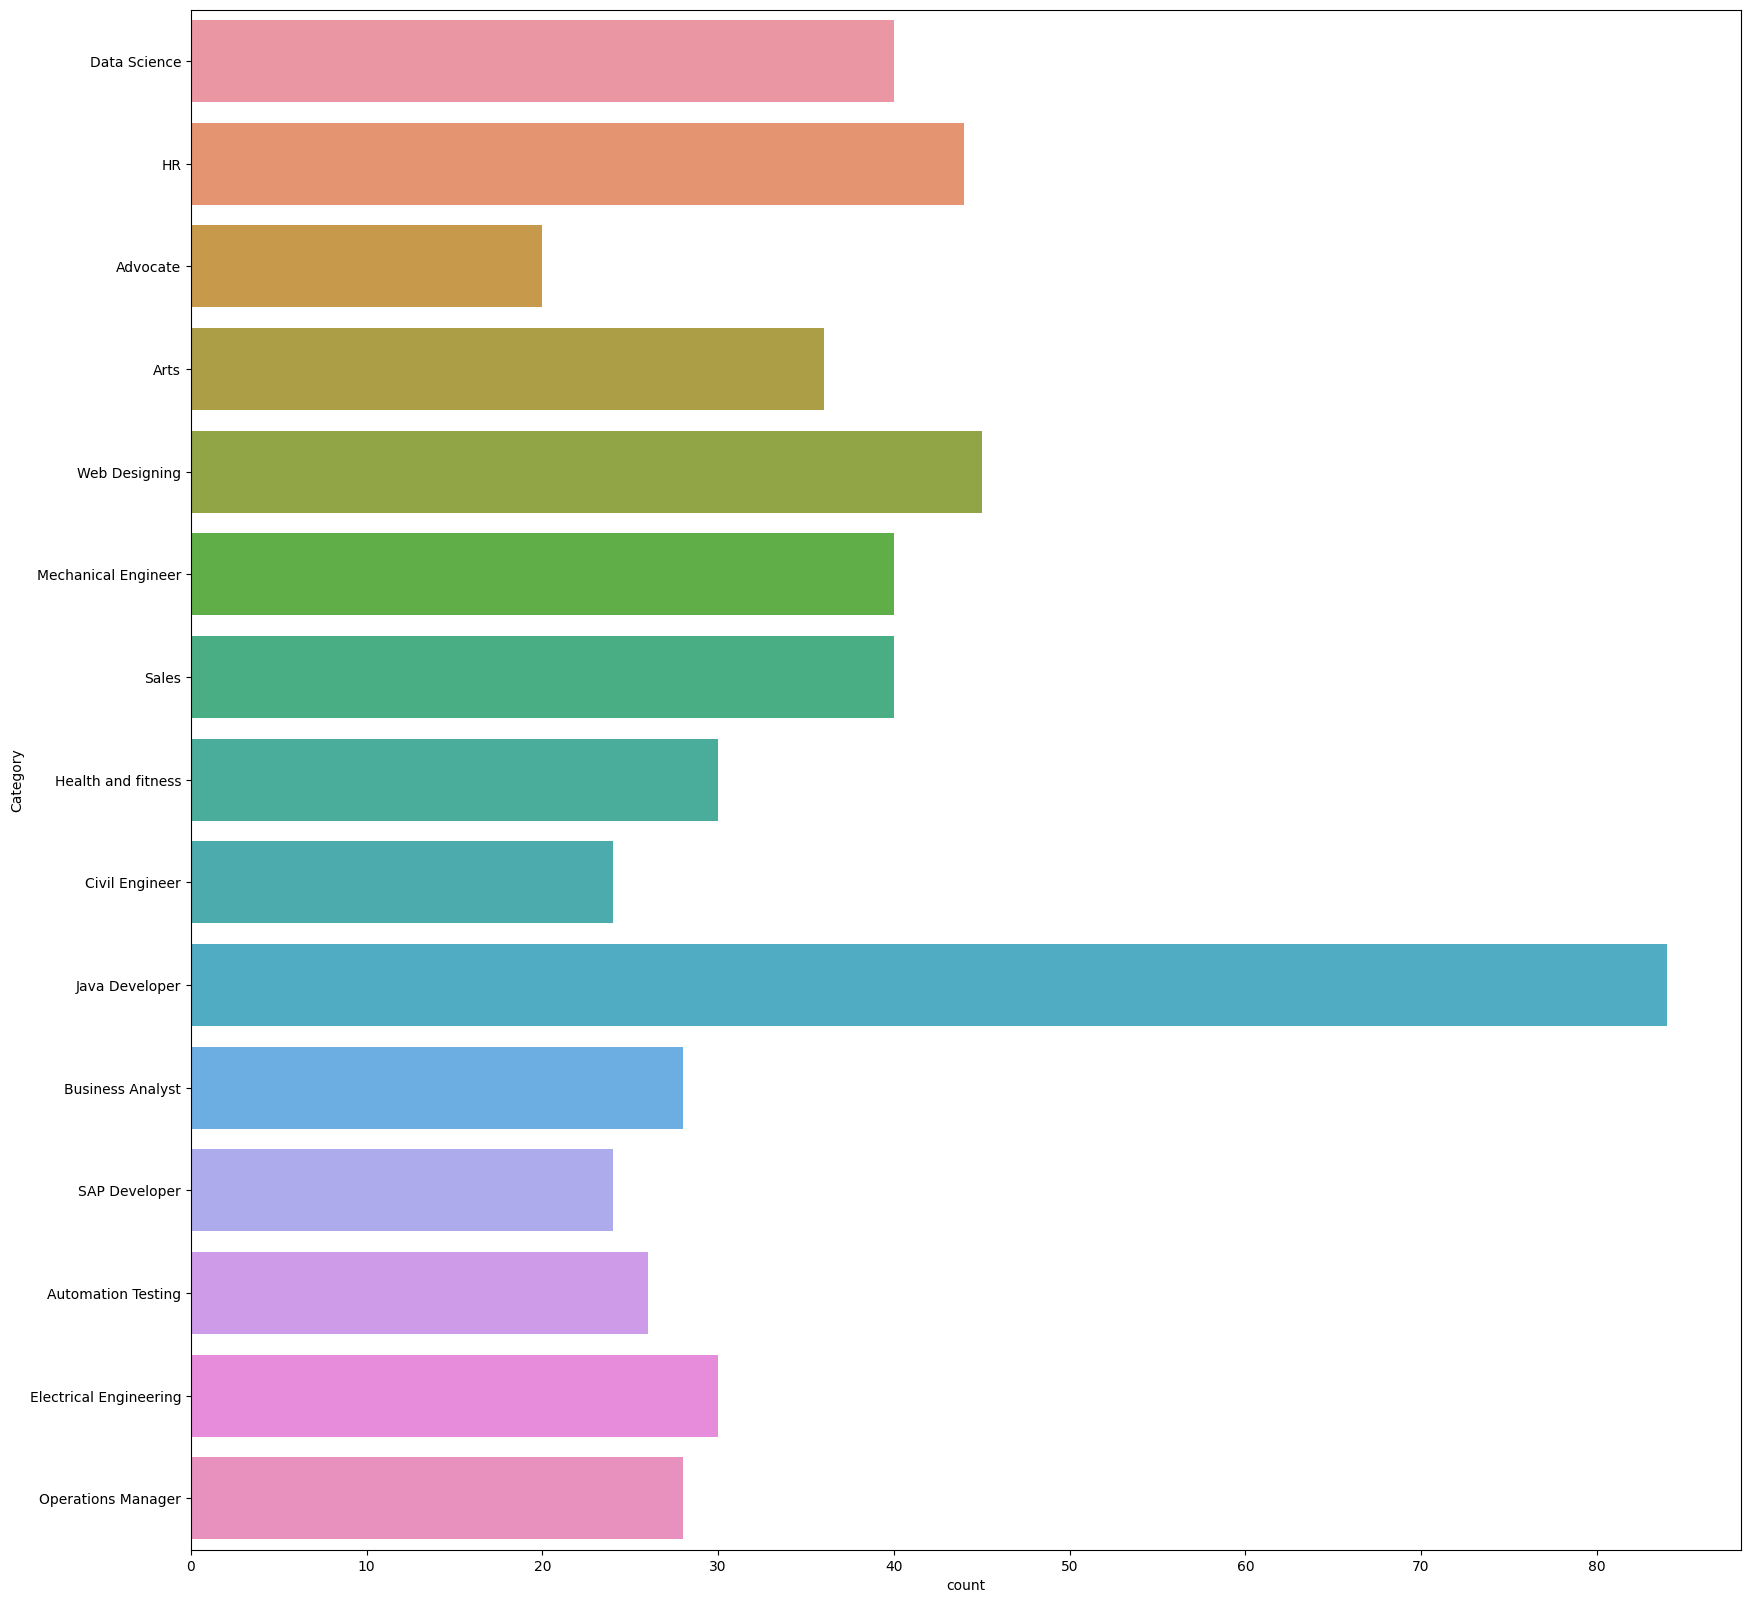

In [5]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.countplot(y='Category',data=df)

# VISULAIZATION

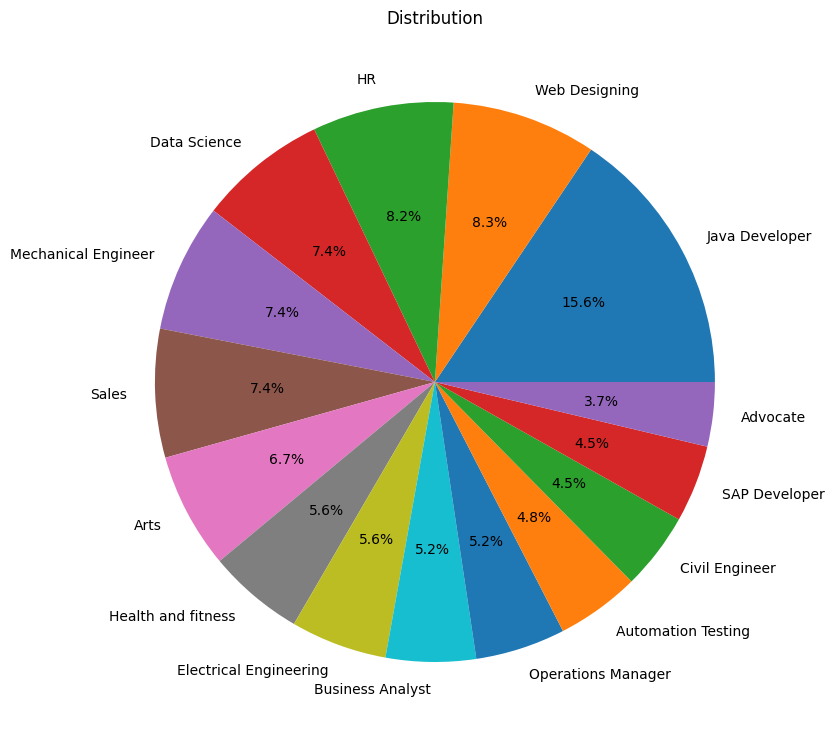

In [6]:
# distribution of catgeories
from matplotlib.gridspec import GridSpec
count=df['Category'].value_counts()
# taking the catgoery names
label=df['Category'].value_counts().keys()

plt.figure(1,figsize=(20,20))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')
color=[cmap(i) for i in np.linspace(0,1,5)]
# by shift+tab see the arguments
plt.subplot(grid[0,1],aspect=1,title="Distribution")


# Pie chart
plt.pie(count,labels=label,autopct='%1.1f%%')
plt.show()

# PREPROCSESSING

In [7]:
import re
def clean(text):
#     removing the urls
    text=re.sub('http\S+\s*',' ',text)
#     removing the copyright symbols
    text=re.sub('RT|cc',' ',text)
#     removing hastags
    text=re.sub('#\S+',' ',text)
#     removing @ symbol
    text=re.sub('@\S+',' ',text)
#     removing the all possible pucntuation
    text=re.sub('[%s]' %re.escape(""""!"#$%&'()*+,-/.:;<>=@?[\]"^_{|}~"""),' ',text)
#     removing the \ symbols
    text=re.sub('\s+',' ',text)
#     removing the weird symbols
    text=re.sub(r'[^\x00-\x7f]',r' ',text)
    return text

In [8]:
df['cleantext']=df.Resume.apply(lambda x:clean(x))
df['cleantext']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
534    Education Details August 2000 B E Electronics ...
535    Education Details BCA Vinayaka Missions Univer...
536    KEY COMPETENCIES    Multi Operations Managemen...
537    IT SKILLS     Well versed with MS Office and I...
538    Education Details August 2000 B E Electronics ...
Name: cleantext, Length: 539, dtype: object

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
# WORD CLOUD
# REMOVING THE STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import wordcloud

# + ke baad jaise bhi stop words ko remove karna hai
stopwords=set(stopwords.words('english')+['``',"''"])
totalwords=[]
sentences=df['Resume'].values

cleansentences=""

for i in range(0,200):
    text=clean(sentences[i])
    cleansentences+=text
    
#     tokenizaing the word
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            totalwords.append(word)

In [11]:
wordfreqlist=nltk.FreqDist(totalwords)

In [12]:
# to take most common words
mostcommon=wordfreqlist.most_common(100)  #most common hundred words
print(mostcommon)

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

In [16]:
from wordcloud import WordCloud

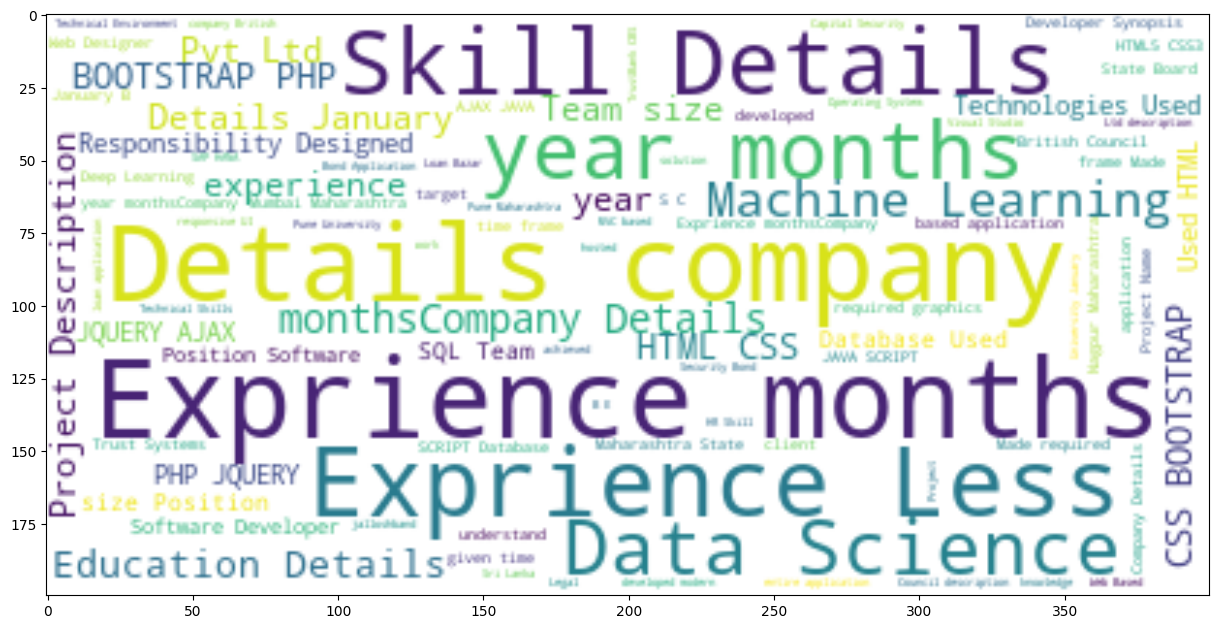

In [23]:
wc=WordCloud(background_color='white').generate(cleansentences)
plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation='bilinear')

In [ ]:
# TRAINING

In [25]:
# converting categhory words into categorial numeric value
from sklearn.preprocessing import LabelEncoder 

var=['Category']
le=LabelEncoder()

for i in var:
    df[i]=le.fit_transform(df[i])

In [26]:
df

,Category,Resume,cleantext
0,5,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,5,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,5,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,5,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...
4,5,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
534,11,Education Details \r\nAugust 2000 B.E Electron...,Education Details August 2000 B E Electronics ...
535,11,Education Details \r\n BCA Vinayaka Missions...,Education Details BCA Vinayaka Missions Univer...
536,11,KEY COMPETENCIES â¶Multi - Operations Managem...,KEY COMPETENCIES Multi Operations Managemen...
537,11,IT SKILLS â¢ Well versed with MS Office and I...,IT SKILLS Well versed with MS Office and I...


In [27]:
# spliiting into trian and test
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack


text=df['cleantext'].values
target=df['Category'].values

vect=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=2000
)
vect.fit(text)

TfidfVectorizer(max_features=2000, stop_words='english', sublinear_tf=True)

In [28]:
wordfeature=vect.transform(text)

In [29]:
wordfeature

<539x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 65868 stored elements in Compressed Sparse Row format>

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(wordfeature,target,random_state=5,test_size=0.2)


In [36]:

from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier

clf=OneVsOneClassifier(KNeighborsClassifier())
clf.fit(xtrain,ytrain)

OneVsOneClassifier(estimator=KNeighborsClassifier())

In [38]:
prediction=clf.predict(xtest)

In [37]:
clf.score(xtest,ytest)

0.9537037037037037

In [40]:
# REPORT
from sklearn.metrics import classification_report
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         6
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         5
           4       1.00      0.62      0.77         8
           5       1.00      1.00      1.00         3
           6       0.91      1.00      0.95        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        17
          10       0.77      1.00      0.87        10
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7

    accuracy                           0.95       108
   macro avg       0.97      0.93      0.94       108
weighted avg       0.96   